# Spatial Tuning Map

In [3]:
import pickle
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path
import numpy as np
from tqdm import tqdm
from scipy import signal

from dataloader import SpikesCoordDataset
from util import *

ROOT = Path("/work")
DATA_DIR = ROOT/Path('data/alldata/')
datalist = np.array([x for x in DATA_DIR.iterdir()])


In [9]:
def cal_stm(sta: NDArray, sigma: float = 1):
    """Calculate spatial tuning map.
    
    sta smoothed by a gaussian kernel and normalized by its max value.
    """
    kernel = gauss2d(np.linspace(-10,10,30), sigma=sigma)
    result = signal.fftconvolve(sta, kernel, mode="same")
    return result/np.sum(result)

## Representatives

### knockout

Text(0.5, 0.98, 'knockout')

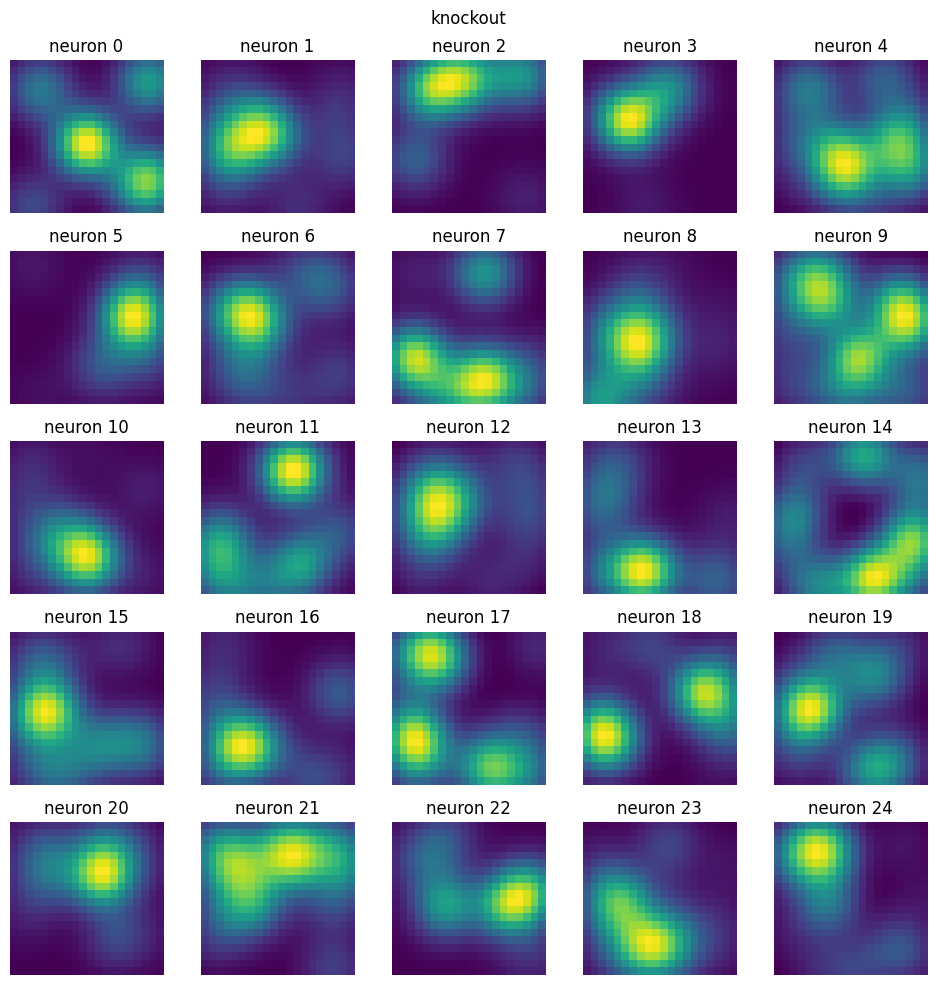

In [12]:
data_dir = datalist[1]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"

dataset = SpikesCoordDataset(data_dir)
num_neuron = dataset.spikes.shape[1]

# show 50 neurons
fig, axes = plt.subplots(nrows=5, ncols=5 ,tight_layout=True, figsize=(10,10))
axes = axes.ravel()
for neuron_id in range(len(axes)):
    sta = cal_sta(dataset, num_par=20, neuron_id=neuron_id)
    stm = cal_stm(sta, sigma=2)
    axes[neuron_id].imshow(stm)
    axes[neuron_id].set_title(f"neuron {neuron_id}")
    axes[neuron_id].axis("off")
fig.suptitle(mouse_type)

### wild-type

Text(0.5, 0.98, 'wild-type')

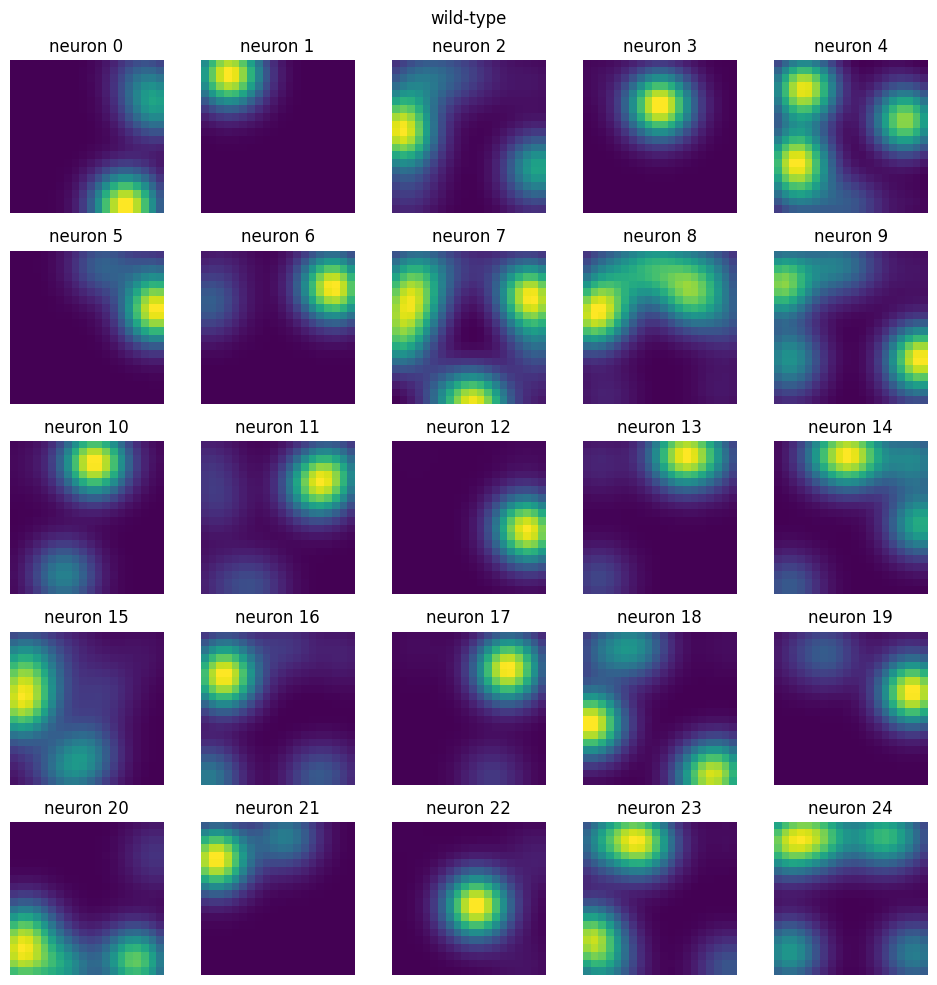

In [11]:
data_dir = datalist[2]
data_name = str(data_dir).split('/')[-1]
mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"

dataset = SpikesCoordDataset(data_dir)
num_neuron = dataset.spikes.shape[1]

# show 50 neurons
fig, axes = plt.subplots(nrows=5, ncols=5 ,tight_layout=True, figsize=(10,10))
axes = axes.ravel()
for neuron_id in range(len(axes)):
    sta = cal_sta(dataset, num_par=20, neuron_id=neuron_id)
    stm = cal_stm(sta, sigma=2)
    axes[neuron_id].imshow(stm)
    axes[neuron_id].set_title(f"neuron {neuron_id}")
    axes[neuron_id].axis("off")
fig.suptitle(mouse_type)

## All mice

In [14]:
OUTPUT_DIR = ROOT/Path("data/interim/data-exploration/")
ko_count, wt_count = 0, 0
for data_dir in tqdm(datalist):
    data_name = str(data_dir).split('/')[-1]

    # show 30 neurons
    fig, axes = plt.subplots(nrows=5, ncols=6 ,tight_layout=True, figsize=(12,12))

    if "CaMKII" in data_name:
        mouse_type = "knockout"
        ko_count+=1
        fig.suptitle(f"{mouse_type} {ko_count}")

    else:
        mouse_type = "wild-type"
        wt_count+=1
        fig.suptitle(f"{mouse_type} {wt_count}")

    dataset = SpikesCoordDataset(data_dir)
    num_neuron = dataset.spikes.shape[1]

    axes = axes.ravel()
    for neuron_id in range(len(axes)):
        if neuron_id+1 > num_neuron: break
        sta = cal_sta(dataset, num_par=20, neuron_id=neuron_id)
        stm = cal_stm(sta, sigma=2)
        axes[neuron_id].imshow(stm)
        axes[neuron_id].set_title(f"n {neuron_id+1}")
        axes[neuron_id].axis("off")

    if not (OUTPUT_DIR/data_name).exists():
        (OUTPUT_DIR/data_name).mkdir()
    fig.savefig(OUTPUT_DIR/data_name/"stm.png")
    fig.clf()

 50%|█████     | 6/12 [01:22<01:20, 13.35s/it]/tmp/ipykernel_1157926/2425242724.py:8: RuntimeWarning: invalid value encountered in divide
  return result/np.sum(result)
100%|██████████| 12/12 [02:47<00:00, 13.97s/it]


<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>